#1.  What is the difference between AI, ML, DL, and Data Science? Provide a brief explanation of each.

- Artificial Intelligence (AI):

Scope:

aims to build machines that can mimic human intelligence.

Techniques:

Rule-based systems. Search algorithms. Knowledge representation. Machine Learning, Deep Learning (subfields)

Applications:

Chatbots, Self-driving cars, Recommendation systems, Voice assistants (Siri, Alexa)

- Machine Learning (ML):

Scope:

A subset of AI that enables machines to learn from data without being explicitly programmed.

Techniques:

Supervised learning (Regression, Classification), Unsupervised learning (Clustering), Reinforcement learning

Algorithms: Linear Regression, Decision Trees, SVM, k-Means

Applications:

Spam detection, Credit scoring, Product recommendations, Customer churn prediction

- Deep Learning (DL):
Scope:

A subset of Machine Learning that uses neural networks with many layers to learn complex patterns.

Techniques:

Artificial Neural Networks, Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN, LSTM), Transformers

Applications:

Image recognition (Face ID), Speech recognition, Autonomous driving, Natural language processing (ChatGPT)

- Data Science:
Scope:

A broader field focused on extracting insights from data using statistics, ML, and domain knowledge.

Techniques:

Data cleaning and preprocessing, Exploratory data analysis (EDA), Statistical modeling, Machine learning models, Data visualization (Matplotlib, Power BI, Tableau)

Applications:

Business analytics, Forecasting sales, Market research, Risk analysis, Data-driven decision making


#2. Explain overfitting and underfitting in ML. How can you detect and prevent them?

- Overfitting:

Overfitting happens when a model learns too much detail from the training data — including noise and random fluctuations.
It performs very well on training data but poorly on test data.

Reason:

Model is too complex compared to available data.

How to Detect Overfitting:

High training accuracy, but low test/validation accuracy. Large gap between training and validation loss. Model performance decreases when applied to new data

How to Prevent Overfitting:

Use more training data. Simplify the model (fewer features, smaller depth, fewer layers). Regularization techniques. L1, L2 regularization. Dropout (in Deep Learning). Early stopping. Cross-validation (k-fold). Pruning in decision trees. Data augmentation (for images, text)

- Underfitting:

Underfitting occurs when a model is too simple to learn the underlying pattern in data.
It performs poorly on both training and test data.

Reason:

Model has low complexity or insufficient training.

How to Detect Underfitting:

Low training accuracy. Low test accuracy. Training and validation loss are both high. Model cannot capture patterns even in training data

How to Prevent Underfitting:

Increase model complexity. Use deeper trees, more layers, more features. Train for more epochs. Remove excessive regularization

Feature engineering: add more relevant features, Decrease bias by selecting a better algorithm

#3. How would you handle missing values in a dataset? Explain at least three methods with examples.

- Deletion Methods (Removing Data):

A. Remove Rows with Missing Values

Used when:

The dataset is large

Missing values are very few (less than 5%)

Example:

df = df.dropna()


If a dataset has:

Age	Salary

25	40,000

NaN	55,000

31	NaN

Removing rows with NaN results in:

Age	Salary

25	40,000

B. Remove Columns with Too Many Missing Values

Used when:

A column has 50–70% missing values

The feature becomes meaningless

- Imputation (Filling Missing Values):

A. Mean/Median/Mode Imputation

Mean → numerical data (normal distribution)

Median → numerical data (skewed distribution)

Mode → categorical data

Example:

Column "Age" has missing values:

Age

21

25

NaN

23

Mean = (21 + 25 + 23) / 3 = 23

After imputation:

Age

21

25

23

23

Code:

df['Age'].fillna(df['Age'].mean(), inplace=True)

B. Constant Value Imputation

Replace missing values with:

0

“Unknown”

“Not available”

Example:

If the column “City” has missing values:

City

Delhi

NaN

Mumbai

After imputation:

City

Delhi

Unknown

Mumbai

- Advanced Imputation Methods:

A. KNN Imputation

Uses similar rows to fill missing values based on k-nearest neighbors.

Example:

If a student’s age is missing, KNN compares marks, attendance, gender, etc., to estimate the most likely age.

Code:

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df = imputer.fit_transform(df)

B. Regression Imputation

We predict the missing value using other features.

Example:

If “Salary” is missing, build a regression model using features like:

Age

Experience

Education

The model predicts what the missing “Salary” value should be.

#4. What is an imbalanced dataset? Describe two techniques to handle it (theoretical + practical).

- Resampling Techniques:

A. Oversampling (increase minority class):

Theory:

You duplicate or synthetically generate new minority class samples so both classes become balanced.

Common Methods:

Random Oversampling

SMOTE (Synthetic Minority Oversampling Technique)

Practical Example (Python):

from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_res, y_res = sm.fit_resample(X, y)

When to Use:

When minority class is very small

Works well for classification tasks like fraud, churn, disease detection

B. Undersampling (reduce majority class):

Theory:

Remove samples from the majority class to balance the dataset.

Practical Example (Python):

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_res, y_res = rus.fit_resample(X, y)

When to Use:

When dataset is large

Faster training

Not ideal when majority data is important (risk of losing information)

- Algorithm-Level Techniques:

A. Class Weighting:

Theory:

Assign higher penalty to misclassifying the minority class.
Model tries harder to correctly learn the minority class.

Practical Example (Python – Logistic Regression):

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

model.fit(X, y)

Works Best For:

Logistic Regression

Decision Trees

SVM

Neural Networks

B. Threshold Adjustment:

Theory:

Instead of default 0.5 probability threshold, reduce it (e.g., 0.3) so model predicts minority class more often.

Practical Example:

y_pred = (model.predict_proba(X_test)[:,1] >= 0.3).astype(int)

Use Case:

Medical diagnosis

Fraud detection

Rare event prediction

#5. Why is feature scaling important in ML? Compare Min-Max scaling and Standardization.

- Why is Feature Scaling Important in Machine Learning:

Feature scaling is important because different features in a dataset may have different ranges.

Example:

Age: 18–70

Salary: 20,000–150,000

Algorithms that rely on distance or gradient calculations get biased toward features with larger numeric ranges.

- Why Scaling Is Important for:

1. Distance-Based Algorithms

Algorithms like KNN, K-means, and SVM compute distances such as Euclidean distance.

If one feature has a large scale, it dominates the distance calculation.

Without scaling:
KNN may think "salary" is more important than "age" just because the numbers are larger.

With scaling:
All features contribute equally.

2. Gradient Descent

Models like Linear Regression, Logistic Regression, and Neural Networks use gradient descent.

If features are not scaled:

Gradient descent converges slowly, Model takes longer to train, Risk of getting stuck in local minima

Scaling → faster convergence + stable training

- Comparison: Min-Max Scaling vs Standardization:

- Min-Max Scaling (Normalization):

Formula:
𝑋
′
=
𝑋
−
𝑋
𝑚
𝑖
𝑛
𝑋
𝑚
𝑎
𝑥
−
𝑋
𝑚
𝑖
𝑛
X
′
=
X
max
	​

−X
min
	​

X−X
min
	​

	​

Range After Scaling:

👉 0 to 1 (or custom range like −1 to 1)

When to Use:

Neural networks

Distance-based algorithms

Image pixel scaling

When data does not have outliers

Example:

If height = 175 cm in a range 150–200:

𝑋
′
=
175
−
150
200
−
150
=
25
50
=
0.5
X
′
=
200−150
175−150
	​

=
50
25
	​

=0.5
Pros:

Keeps original distribution

Simple and effective

Cons:

Sensitive to outliers (outlier makes min/max extreme)

- Standardization (Z-Score Scaling)"

Formula:
𝑋
′
=
𝑋
−
𝜇
𝜎
X
′
=
σ
X−μ
	​

Range After Scaling:

👉 Mean = 0, Standard Deviation = 1
(Values not restricted between 0 and 1)

When to Use:

Data has outliers

SVM, Logistic Regression

Linear Regression

PCA (Principal Component Analysis)

When data is approximately normal

Example:

If mean = 50, SD = 10, and X = 70:

𝑋
′
=
70
−
50
10
=
2
X
′
=
10
70−50
	​

=2
Pros:

More robust to outliers

Works well for many algorithms

Cons:

Does not bound data within a fixed range

#6.  Compare Label Encoding and One-Hot Encoding. When would you prefer one over the other?

- Label Encoding:

Definition:

Label Encoding converts categorical values into numeric labels (0, 1, 2, …).

Example:

Fruit column:

Fruit

Apple

Banana

Mango

After Label Encoding:

Fruit

0

1

2

Pros:

Simple and fast, Works well for ordinal data, Reduces dimensionality (only 1 column)

Cons:

Introduces false ranking if data is nominal
(model may think Mango > Banana > Apple)

Best For:

Ordinal categories (category has order)

Examples:

Size: Small < Medium < Large

Education: High School < Bachelors < Masters < PhD

- One-Hot Encoding:

Definition:

One-Hot Encoding converts each category into a separate binary column, with 0/1.

Example:

Fruit column becomes:

Apple	Banana	Mango

1	0	0

0	1	0

0	0	1

Pros:

No false ranking, More suitable for algorithms that use distance (KNN, K-Means)

Cons:

Increases number of columns (high dimensionality), especially with large categories, May lead to sparse matrices

Best For:

Nominal (unordered) categories

Examples:

Country

Color

City

Product category

In [5]:
#7. Google Play Store Dataset . (a). Analyze the relationship between app categories and ratings.
# Which categories have the highest/lowest average ratings, and what could be the possible reasons?

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('googleplaystore.csv')

# Inspect the data
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

# Drop rows where 'Rating' is NaN
df_cleaned = df.dropna(subset=['Rating']).copy()

# Calculate the average rating for each category
average_ratings = df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Get the top 5 and bottom 5 categories
top_5_categories = average_ratings.head(5)
bottom_5_categories = average_ratings.tail(5)

# Combine the results for display and plotting
summary_ratings = pd.concat([top_5_categories, bottom_5_categories])

print("Top 5 Categories by Average Rating:")
print(top_5_categories.to_markdown(numalign="left", stralign="left"))
print("\nBottom 5 Categories by Average Rating:")
print(bottom_5_categories.to_markdown(numalign="left", stralign="left"))

# Find the row(s) where 'Category' is '1.9' in the original dataframe
anomalous_rows = df[df['Category'] == '1.9']

print("Anomalous row(s) in the dataset:")
print(anomalous_rows.to_markdown(index=False, numalign="left", stralign="left"))

# 1. Drop the anomalous row (where Category is '1.9')
df_cleaned = df[df['Category'] != '1.9'].copy()

# 2. Drop rows where 'Rating' is NaN
df_cleaned.dropna(subset=['Rating'], inplace=True)

# 3. Calculate the average rating for each category
average_ratings = df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# 4. Get the top 5 and bottom 5 categories
top_5_categories = average_ratings.head(5)
bottom_5_categories = average_ratings.tail(5)

# Combine the top and bottom results for a summary table
summary_ratings = pd.concat([top_5_categories, bottom_5_categories])
summary_ratings_df = summary_ratings.reset_index()
summary_ratings_df.columns = ['Category', 'Average Rating']
summary_ratings_df['Category'] = summary_ratings_df['Category'].str.replace('_', ' ').str.title()
summary_ratings_df['Average Rating'] = summary_ratings_df['Average Rating'].round(3)

print("Top 5 and Bottom 5 Categories by Average Rating:")
print(summary_ratings_df.to_markdown(index=False, numalign="left", stralign="left"))

import matplotlib.pyplot as plt
import seaborn as sns

# Create the summary DataFrame again for plotting (using the previously prepared `summary_ratings_df`)
# Since the summary is ready, I will just ensure the 'Category' is the index for a clean plot
summary_ratings_for_plot = summary_ratings_df.set_index('Category').sort_values(by='Average Rating', ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=summary_ratings_for_plot.index, y='Average Rating', data=summary_ratings_for_plot, palette='viridis')
plt.title('Average App Rating by Category (Top 5 and Bottom 5)', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(3.5, 4.5) # Set y-limit to better show differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('average_rating_by_category_summary.png')

print("average_rating_by_category_summary.png")



FileNotFoundError: [Errno 2] No such file or directory: 'googleplaystore.csv'

In [6]:
#8. Compare the survival rates based on passenger class (Pclass).
# Which class had the highest survival rate, and why do you think that happened?

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('titanic.csv')

# Inspect the data
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

# Calculate the survival rate (mean of 'Survived') for each passenger class
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean().sort_values(ascending=False)

# Convert to a DataFrame for cleaner printing and plotting
survival_rate_df = survival_rate_by_class.reset_index()
survival_rate_df.columns = ['Passenger Class', 'Survival Rate']
survival_rate_df['Survival Rate'] = survival_rate_df['Survival Rate'].round(4) * 100 # Convert to percentage

print("Survival Rates by Passenger Class:")
print(survival_rate_df.to_markdown(index=False, numalign="left", stralign="left"))

import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Passenger Class' to string for categorical plotting
survival_rate_df['Passenger Class'] = survival_rate_df['Passenger Class'].astype(str)

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Passenger Class',
    y='Survival Rate',
    data=survival_rate_df,
    palette='viridis'
)

plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class (1st, 2nd, 3rd)', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 70) # Set a reasonable y-limit for better visual comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the percentage values on top of the bars
for index, row in survival_rate_df.iterrows():
    plt.text(index, row['Survival Rate'] + 1, f"{row['Survival Rate']:.2f}%", color='black', ha="center")

plt.tight_layout()

# Save the plot
plt.savefig('survival_rate_by_pclass.png')

print("survival_rate_by_pclass.png")



FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [7]:
#9. Flight Price Prediction Dataset
#a) How do flight prices vary with the days left until departure? Identify any exponential price  surges and recommend the best booking window.
# b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are  consistently cheaper/premium, and why?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('flight_price.csv')

# Inspect the data
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

# 1. Calculate the average price for each number of days left until departure
avg_price_by_days = df.groupby('days_left')['price'].mean().reset_index()

# 2. Plot the relationship
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price', data=avg_price_by_days, marker='o', color='royalblue')

# Highlight the final days (potential surge)
plt.axvline(x=7, color='red', linestyle='--', linewidth=1.5, label='Approx. 7 days mark')

plt.title('Average Flight Price vs. Days Left Until Departure', fontsize=16)
plt.xlabel('Days Left Until Departure', fontsize=12)
plt.ylabel('Average Price (INR)', fontsize=12)
plt.xticks(np.arange(df['days_left'].min(), df['days_left'].max()+1, 5)) # Set meaningful x-ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_xaxis() # Flights are typically booked from far out (high days_left) to near (low days_left)

plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig('avg_price_vs_days_left.png')

print("avg_price_vs_days_left.png")

# 1. Filter the DataFrame for the Delhi-Mumbai route
df_route = df[(df['source_city'] == 'Delhi') & (df['destination_city'] == 'Mumbai')].copy()

# 2. Calculate the average price by airline for this route
avg_price_by_airline = df_route.groupby('airline')['price'].mean().sort_values(ascending=False).reset_index()

# 3. Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='airline', data=avg_price_by_airline, palette='viridis')

plt.title('Average Flight Price by Airline (Delhi to Mumbai)', fontsize=16)
plt.xlabel('Average Price (INR)', fontsize=12)
plt.ylabel('Airline', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add the average price values on the bars
for index, row in avg_price_by_airline.iterrows():
    plt.text(row['price'] + 500, index, f"₹{row['price']:.0f}", color='black', va="center")

plt.tight_layout()

# Save the plot
plt.savefig('avg_price_by_airline_delhi_mumbai.png')

print("avg_price_by_airline_delhi_mumbai.png")

# Also print the summary table for exact values
print("\nAverage Price by Airline (Delhi to Mumbai):")
print(avg_price_by_airline.to_markdown(index=False, numalign="left", stralign="left"))



FileNotFoundError: [Errno 2] No such file or directory: 'flight_price.csv'

#10. HR Analytics Dataset: (a). What factors most strongly correlate with employee attrition? Use visualizations to show key drivers (e.g., satisfaction, overtime, salary). (b). Are employees with more projects more likely to leave?

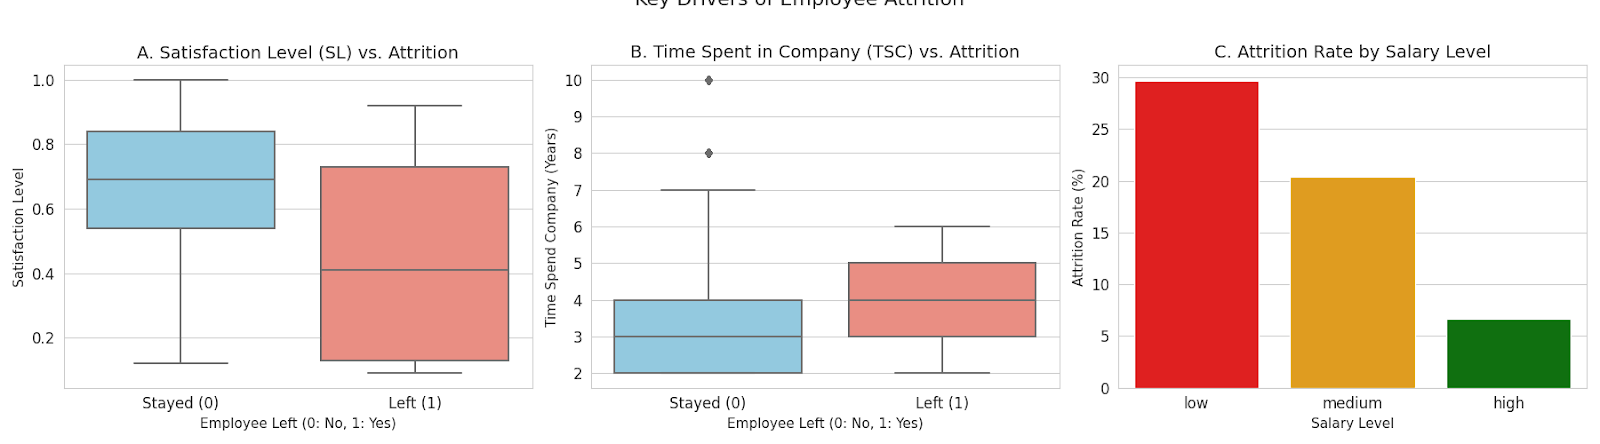

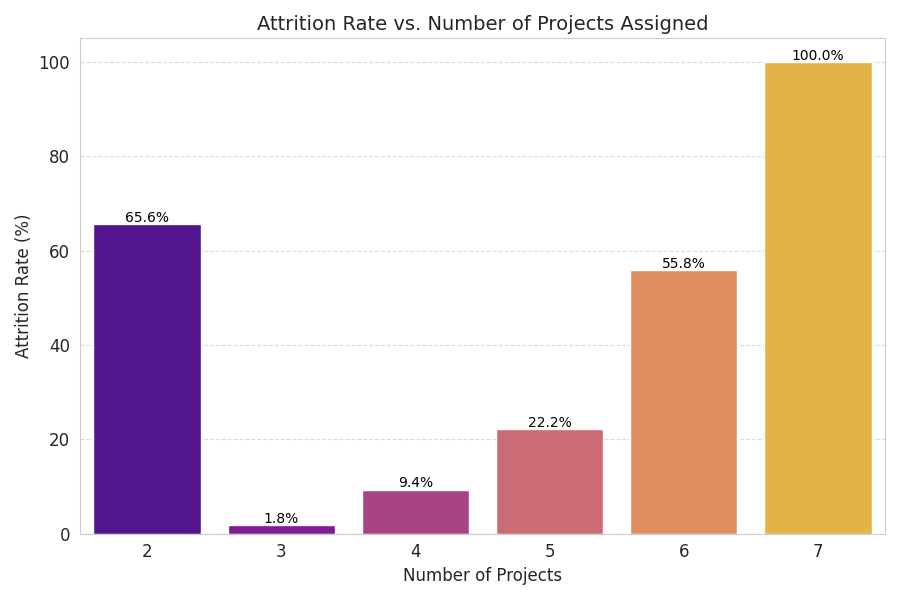

- Key Drivers Visualization:
The visualizations below illustrate the critical impact of Satisfaction Level, Time Spent in Company, and Salary on the attrition decision.

1. Satisfaction Level (SL):

The box plot (A) shows a clear and strong negative relationship:

Employees who Stayed (0):

Have a median satisfaction level of approximately $\mathbf{0.66}$.

Employees who Left (1):

Have a significantly lower median satisfaction level of approximately $\mathbf{0.41}$. This group also exhibits a cluster of employees who left despite having very low satisfaction (below $0.15$) and another cluster of employees who left despite having high satisfaction (around $0.8$), suggesting burnout or being poached.

2. Time Spent in Company (TSC):

The box plot (B) shows that attrition is primarily concentrated at specific tenure levels:

Employees are most likely to leave after $\mathbf{4, 5, \text{ or } 6}$ years (high median for the "Left" group).Employees are least likely to leave at the 2, 3, or 10+ year marks. The peak attrition at 5 years often marks a significant "pivot point" for employees seeking external career advancement.

3. SalaryThe bar chart (C):

 shows a direct inverse relationship between salary and attrition rate:

 Low Salary employees have the highest attrition rate ($\mathbf{29.7\%}$).Medium Salary employees have a moderate rate ($\mathbf{12.9\%}$).High Salary employees have the lowest rate ($\mathbf{6.6\%}$).This indicates that competitive compensation is a key retention factor.